<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       Open Table Formats on Teradata - ClearScape Analytics Demo
  <br>
       <img id="teradata-logo" src="images/TeradataLogo.png" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>
<hr>

<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #ffffff; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       <img id="open-table-format" src="images/OTFDiagram2.png" alt="OTF" style="height: auto; margin-top: 20pt;">
    </p>
</header>
<hr>

<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>Introduction</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
In this example we will be analyzing the number of complaints over time received by the Consumer Financial Protection Bureau (CFPB).</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
How can we use Vantage and OTFs to extract insights and tell a story behind a dataset? In this use case, you will see how powerful and simple it is to extract answers from a public dataset available through <a href="http://data.gov">Data.gov</a>. We use SQL and a visualization tool to analyze the number of complaints over time to answer the following questions:</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
 <i>What are the trends of complaints over time? How can we interpret the outliers in the dataset?</i>
</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>    
By answering questions like the ones above, we gain a deeper understanding of the dataset, and we can explain in plain language how the number of complaints evolve over time. In the Explore section, we focus on analyzing the number of complaints over time and identifying trends and outliers in the time series to answer the questions above.
</p>    

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>1. Connect to Vantage</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let’s start by connecting to our VantageCloud environment. This enables us to execute queries directly against Iceberg tables stored across clouds.</p>

In [71]:
%connect otf_demo_env

Connected: 'otf_demo_env' connection activated for user 'tdiceberg'


<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Getting Data for This Demo</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>For this demo, we are using Open Table Formats (OTF) data stored in a cloud data lake on AWS S3. Specifically, the dataset is managed using the Iceberg table format with the AWS Glue catalog.

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Because we are demonstrating schema evolution features, we will create datalakes and catalogs locally in Teradata VantageCloud and access them through the notebook interface.

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The following SQL cell creates a datalake called iceberg_glue in the Teradata server database (TD_SERVER_DB). It configures the datalake to use the Iceberg table format, pointing to the S3 bucket location, with appropriate external security invoker settings for the catalog and storage.

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Please run the cell to initialize the datalake and catalog connection. This will allow subsequent queries to interact with Iceberg-managed data on AWS S3 as native Teradata tables.

</p>

In [ ]:
CREATE DATALAKE TD_SERVER_DB.iceberg_glue  

EXTERNAL SECURITY INVOKER TRUSTED CATALOG ICEBERG_INVOKER_SIMPLE , 

EXTERNAL SECURITY INVOKER TRUSTED STORAGE ICEBERG_INVOKER_SIMPLE  

USING  

catalog_type  ('glue') 

catalog_location  ('<CATALOG LOCATION>') 

storage_location  ('<STORAGE LOCATION>') 

storage_region  ('us-west-2') 

TABLE FORMAT iceberg ; 

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>2. Querying the Data</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We have made our connection to the Vantage system, now let's start exploring the data. Not a problem to analyze large datasets using Vantage, lets take a look at a sample of the data.</p>

In [ ]:
HELP TABLE

In [66]:
SELECT TOP 40 * FROM iceberg_glue.vim.consumer_complaints; 

,complaint_id,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed
1,2663423,2017-09-08,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,"""",,"EQUIFAX, INC.",RI,028XX,,Consent provided,Web,2017-09-08,Closed with explanation,Yes,
2,2667994,2017-09-08,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,,,"EQUIFAX, INC.",CA,94501,,Consent not provided,Web,2017-09-08,Closed with explanation,Yes,
3,2570464,2017-07-11,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,T,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"I.C. System, Inc.",NV,891XX,,Consent provided,Web,2017-07-11,Closed with explanation,Yes,
4,1960479,2016-06-08,Bank account or service,Other bank product/service,"Account opening, closing, or management",,,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"BANK OF AMERICA, NATIONAL ASSOCIATION",AZ,85041,,,Referral,2016-06-10,Closed with explanation,Yes,N
5,2570607,2017-07-11,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Account information incorrect,I,,"EQUIFAX, INC.",GA,30252,,Consent provided,Web,2017-07-11,Closed with explanation,Yes,
6,2660814,2017-09-08,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Problem with fraud alerts or security freezes,,S,,"EQUIFAX, INC.",CA,91746,,Consent provided,Web,2017-09-08,Closed with explanation,Yes,
7,2570080,2017-07-11,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Credit inquiries on your report that you dont recognize,,,"EQUIFAX, INC.",,,,,Phone,2017-07-11,Closed with explanation,Yes,
8,2660814,2017-09-08,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Problem with fraud alerts or security freezes,,S,,"EQUIFAX, INC.",CA,91746,,Consent provided,Web,2017-09-08,Closed with explanation,Yes,
9,2668106,2017-09-08,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,E,,"EQUIFAX, INC.",CA,917XX,,Consent provided,Web,2017-09-08,Closed with explanation,Yes,
10,2476953,2017-05-05,Credit card or prepaid card,General-purpose credit card or charge card,Problem when making payments,You never received your bill or did not know a payment was due,,,Alliance Data Card Services,NE,68715,,,Referral,2017-05-05,Closed with monetary relief,Yes,


<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>3. Visualizing the Data</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
From the query above, we notice that this dataset has a lot of information. To derive some insights, we need to start grouping the data.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
The first column is <b>date_received</b>. This is the date the complaints were received, and it means that we can look at a time series plot of the data. Let's start by grouping the counts of <b>complaint_id</b> over time, using <b>date_received</b> as our time axis.</p>

In [57]:
select date_received, count(complaint_id) as counts
from iceberg_glue.vim.consumer_complaints
group by date_received;

,date_received,counts
1,2017-09-08,14
2,2016-06-08,12
3,2017-07-11,11
4,2017-05-05,3


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
By visualizing the data above, we can see that the number of complaints varies a lot over time and there also seem to be more complaints as time progresses. There are also some unusual spikes in 2017. Let's understand more about our data. We start by looking at the general trend.
<br>
<br>
Let's group the data by month and re-plot the graph above.</p>

In [60]:
select extract(year from date_received) || extract(month from date_received) as month_date, count(complaint_id) as counts
from iceberg_glue.vim.consumer_complaints
group by month_date
order by month_date;

,month_date,counts
1,2016 6,12
2,2017 5,3
3,2017 7,11
4,2017 9,14


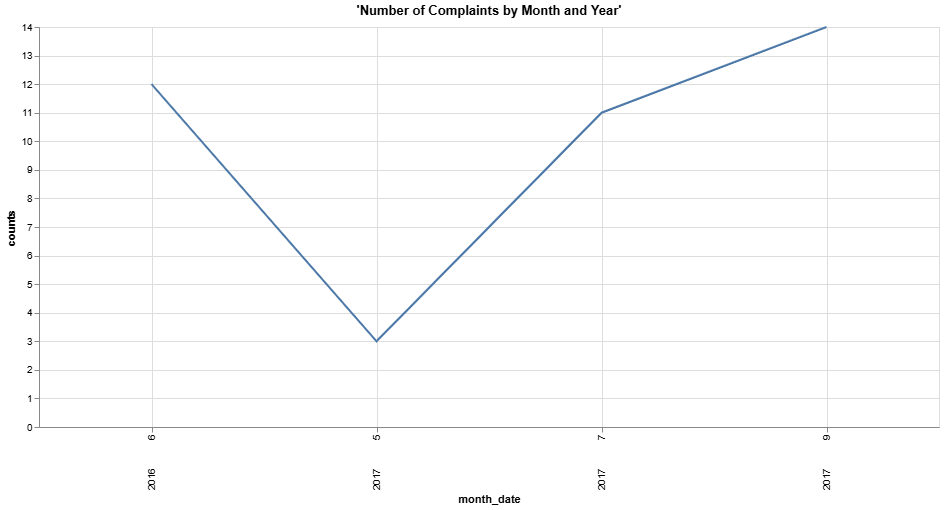

In [61]:
%chart month_date, counts, title='Number of Complaints by Month and Year', width=900, height=400, mark=line

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let's look at some of the issues that were reported during these dates.</p>
<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>4. Extracting Insights from the Data</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
Let's narrow down the two spikes above and see exactly where they are happening. We can do this by plotting another time series plot, this time only in 2017.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let's look at some of the issues that were reported during these dates.</p>

In [74]:
select date_received, company, count(company) as counts
from iceberg_glue.vim.consumer_complaints
where date_received in (
    date '2017-01-19',
    date '2017-01-20',
    date '2017-09-08',
    date '2017-09-09',
    date '2017-09-13'
)
group by date_received, company
order by date_received, counts desc;

,date_received,company,counts
1,2017-09-08,"EQUIFAX, INC.",11
2,2017-09-08,Experian Information Solutions Inc.,2
3,2017-09-08,PNC Bank N.A.,1



<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Interestingly, we can see that the great majority of the the complaints were directed at one company: EQUIFAX.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
Let's now look at the top issues for Equifax during those periods to confirm our hypothesis.</p>

In [69]:
-- analyze top issues reported against EQUIFAX on 2017-01-19 and 2017-01-20
select
    company,
    product,
    issue,
    count(issue) as counts
from iceberg_glue.vim.consumer_complaints
where date_received in (
    date '2017-09-08',
    date '2017-09-09',
    date '2017-09-13') and
        company like 'EQUIFAX%'
group by company, product, issue
order by counts desc;

,company,product,issue,counts
1,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Improper use of your report,4
2,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Credit monitoring or identity theft protection services,2
3,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Problem with fraud alerts or security freezes,2
4,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Incorrect information on your report,1
5,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Problem with a credit reporting company's investigation into an existing problem,1
6,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Problem with a credit reporting companys investigation into an existing problem,1


<p style = 'font-size:16px;font-family:Arial;color:#00233C'> The top issues talk about improper use of the credit report, fraud alerts, identity theft etc. This really does seem related to the Equifax breach that happened around the same time frame.</p>

<hr style="height:2px;border:none;background-color:#00233C;"> <p style='font-size:20px;font-family:Arial;color:#00233C'><b>Explore</b></p> <p style='font-size:16px;font-family:Arial;color:#00233C'> This notebook highlights the power of Open Table Formats (OTF) in enabling seamless, scalable, and flexible data exploration across multiple cloud data lakes. By leveraging Vantage’s support for OTFs like Apache Iceberg and Delta Lake, you can run SQL queries directly on data stored in different catalogs and storage systems without worrying about data movement or format compatibility.<br> Throughout this demo, you’ve seen how Vantage’s integration with OTFs simplifies querying and managing evolving datasets while preserving data consistency and enabling advanced features like schema evolution, partition management, and time travel.<br> You can continue to leverage these capabilities to uncover insights from the preloaded dataset. Here are some exploration ideas that show the practical value of OTFs in real-world data analytics:</p> <ul style='font-size:16px;font-family:Arial;color:#00233C'> <li>Which product categories generate the most complaints? Grouping by <b>product</b> demonstrates how OTF tables allow efficient aggregation on large, diverse datasets.</li> <li>Through which channels are customers submitting their complaints? Analyzing the <b>submitted_via</b> column shows how OTF supports diverse data attributes for comprehensive analysis.</li> <li>What share of complaints are customer-disputed? Aggregating <b>customer_disputed</b> flags illustrates how OTFs enable straightforward filtering and counting operations.</li> <li>Is there any seasonality in complaint patterns? Using OTF time travel and partitioning features, you can analyze trends and seasonality across time, revealing temporal insights without data duplication.</li> </ul>

<footer style="padding-bottom:35px; background:#f9f9f9; border-bottom:3px solid #00233C">
    <div style="float:left;margin-top:14px">ClearScape Analytics™</div>
    <div style="float:right;">
        <div style="float:left; margin-top:14px">
            Copyright © Teradata Corporation - 2025. All Rights Reserved
        </div>
    </div>
</footer>